# Final Project 

# Loan Default Prediction

#### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

#### Loading the dataset into a DataFrame named loan_df

In [2]:
loan_df = pd.read_csv("Loan_default.csv")

## Part 1: Data Cleaning

#### Using df.head( ) to view all the columns of the dataset

In [3]:
pd.set_option('display.max_columns', None)
loan_df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


#### Since the ID is not important for prediction, and the dataset spans only 1 year, which is 2019, we are dropping the ID and year columns from the dataframe.
#### The secured_by and security_type also do not contribute any value to the dataset and will not help in prediction as they hold the same values. Hence we will drop those too

In [4]:
loan_df = loan_df.drop(columns=['ID', 'year', 'Secured_by', 'Security_Type'])

#### Checking the number of null values in each column of the dataset

In [5]:
loan_df.isnull().sum()

loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV                          15098
Region                           0
Status              

#### We will now view the statistics of the columns that have null values, and decide how to replace the null values in each column

#### Here, we wrote a function that calculate the min, max, mean, median and mode of a column, and prints it. Although this can be done using the describe( ) method, we created this function as we did not need to view the details of every column. The get_stats( ) function takes in 2 parameters: The name of the column we need the statistics of, and a boolean value for mode. Since we don't need the mode of all the columns, the mode will only be calculated and printed if the boolean value passed as an argument is true

In [5]:
def get_stats(colName, mode):
    print("The minimum value of "+ colName + " is: " + str((loan_df[colName]).min()))
    print("The maximum value of "+ colName + " is: " + str((loan_df[colName]).max()))
    print("The median value of "+ colName + " is: " + str((loan_df[colName]).median()))
    print("The mean value of "+ colName + " is: " + str((loan_df[colName]).mean()))
    if mode == True:
        print("The mode of "+ colName + " is: " + str((loan_df[colName]).mode()[0]))
    return None

#### Viewing the statistics of the rate_of_interest column

In [7]:
get_stats("rate_of_interest", False)

The minimum value of rate_of_interest is: 0.0
The maximum value of rate_of_interest is: 8.0
The median value of rate_of_interest is: 3.99
The mean value of rate_of_interest is: 4.045475804367777


#### Viewing the statistics of the Interest_rate_spread column

In [7]:
get_stats("Interest_rate_spread", False)

The minimum value of Interest_rate_spread is: -3.638
The maximum value of Interest_rate_spread is: 3.357
The median value of Interest_rate_spread is: 0.3904
The mean value of Interest_rate_spread is: 0.4416556604868295


#### Viewing the statistics of the upfront_charges column

In [8]:
get_stats("Upfront_charges", False)

The minimum value of Upfront_charges is: 0.0
The maximum value of Upfront_charges is: 60000.0
The median value of Upfront_charges is: 2596.45
The mean value of Upfront_charges is: 3224.996126591334


#### Viewing the statistics of the term column

In [9]:
get_stats("term", True)

The minimum value of term is: 96.0
The maximum value of term is: 360.0
The median value of term is: 360.0
The mean value of term is: 335.1365816899797
The mode of term is: 360.0


#### Since the Neg_ammortization column only has 2 values, we are checking to see the count of each (we will use the one with a higher count to replace the null values as it is the mode)

In [10]:
print(loan_df['Neg_ammortization'].value_counts())

not_neg    133420
neg_amm     15129
Name: Neg_ammortization, dtype: int64


#### Viewing the statistics of the property_value column

In [11]:
get_stats("property_value", True)

The minimum value of property_value is: 8000.0
The maximum value of property_value is: 16508000.0
The median value of property_value is: 418000.0
The mean value of property_value is: 497893.46569640347
The mode of property_value is: 308000.0


#### Viewing the statistics of the LTV (Loan to Value Ratio) column

In [12]:
get_stats("LTV", True)

The minimum value of LTV is: 0.967478198
The maximum value of LTV is: 7831.25
The median value of LTV is: 75.13586957
The mean value of LTV is: 72.74645733387138
The mode of LTV is: 81.25


#### Viewing the statistics of the DTIR1 (Debt to Income Ratio) column

In [13]:
get_stats("dtir1", True)

The minimum value of dtir1 is: 5.0
The maximum value of dtir1 is: 61.0
The median value of dtir1 is: 39.0
The mean value of dtir1 is: 37.73293242017198
The mode of dtir1 is: 37.0


#### Based on the results of the statistics, we now fill the null values of the aforementioned columns with the appropriate measure of central tendency. We then check to see whether the null values were succesfully filled.

In [14]:
loan_df['income'].fillna(value=loan_df['income'].median(), inplace=True)
loan_df['rate_of_interest'].fillna(value=loan_df['rate_of_interest'].median(), inplace=True)
loan_df['Interest_rate_spread'].fillna(value=loan_df['Interest_rate_spread'].median(), inplace=True)
loan_df['Upfront_charges'].fillna(value=loan_df['Upfront_charges'].mean(), inplace=True)
loan_df['term'].fillna(value=loan_df['term'].mode()[0], inplace=True)
loan_df['Neg_ammortization'].fillna(value=loan_df['Neg_ammortization'].mode()[0], inplace=True)
loan_df['property_value'].fillna(value=loan_df['property_value'].mean(), inplace=True)
loan_df['LTV'].fillna(value=loan_df['LTV'].mean(), inplace=True)
loan_df['dtir1'].fillna(value=loan_df['dtir1'].median(), inplace=True)

loan_df.isnull().sum()

loan_limit                   3344
Gender                          0
approv_in_adv                 908
loan_type                       0
loan_purpose                  134
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest                0
Interest_rate_spread            0
Upfront_charges                 0
term                            0
Neg_ammortization               0
interest_only                   0
lump_sum_payment                0
property_value                  0
construction_type               0
occupancy_type                  0
total_units                     0
income                          0
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                           200
submission_of_application     200
LTV                             0
Region                          0
Status                          0
dtir1         

#### Here we check the maximum number of null values that still exist when seen in relation to their value in the status column

In [15]:
null_cols_status_0 = loan_df[loan_df["Status"] == 0].isnull().sum() # we can also use isnull method both are same
null_cols_status_1 = loan_df[loan_df["Status"] == 1].isnull().sum() # we can also use isnull method both are same

print (f"Maximum number of null values in the class 0: {np.max(null_cols_status_0)}")
print (f"Maximum number of null values in the class 1: {np.max(null_cols_status_1)}")

Maximum number of null values in the class 0: 2463
Maximum number of null values in the class 1: 881


#### Since the number of null values are proportionate to the distribution of values in the status column, we can drop all the remaining null value rows without losing out on too much valuable data

In [16]:
loan_df.dropna(inplace=True)
print("The number of null values in the dataset is: ", loan_df.isnull().sum().sum())

The number of null values in the dataset is:  0


## Part 2: Exploratory Data Analysis

#### To display plots better for our exploratory data analysis section, we create a copy of our dataset, and convert the status categorical variable values from 0 and 1, to, Did not Default and Defaulted

In [17]:
plot_df = loan_df.copy()
plot_df['Status'] = plot_df['Status'].astype('category')
change={0:'Did not Default',1:'Defaulted'}
plot_df['Status'] = plot_df['Status'].replace(change)

#### Plot 1: We plot a bargraph of the Defaulters and Non-Defaulters, with income as the y-axis and split the Loan holders by their genders 

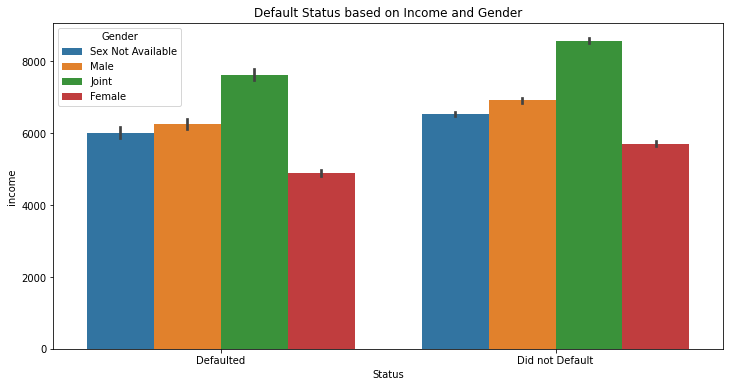

In [18]:
fig, ax = plt.subplots()
sns.barplot(data=plot_df, x='Status', y='income', hue='Gender')
fig.set_size_inches([12,6])
plt.title("Default Status based on Income and Gender")
plt.savefig('Default:Income&Gender.png')
plt.show()

#### Plot 2: We plot a bargraph of the Defaulters and Non-Defaulters, with the loan amount as the y-axis and split the Loan holders by their age

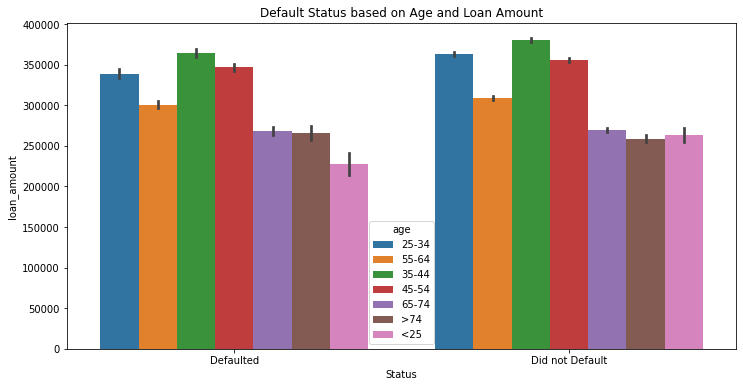

In [19]:
fig,ax=plt.subplots()
sns.barplot(data=plot_df,x='Status',y='loan_amount',hue='age')
fig.set_size_inches([12,6])
plt.title("Default Status based on Age and Loan Amount")
plt.savefig("Default:Age&Amount.png")
plt.show()

#### Plot 3: We plot a scatter plot of the loan amount v/s. the property value, and we visualize the results with the term of the loan as the hue of the scatterplot points

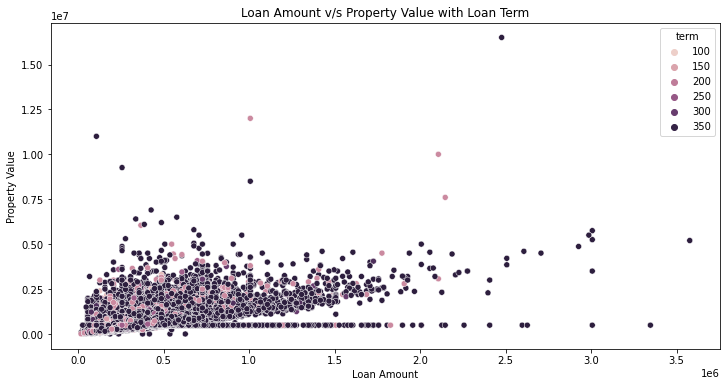

In [20]:
fig,ax=plt.subplots()
sns.scatterplot(data=plot_df, x="loan_amount", y="property_value", hue="term").set(title='Loan Amount v/s Property Value with Loan Term', facecolor="white")
plt.xlabel("Loan Amount")
plt.ylabel("Property Value")
fig.set_size_inches([12,6])
plt.savefig("LoanvsProperty.png")
plt.show()

#### Plot 4: We plot a scatter plot of the loan amount v/s. the interest rate

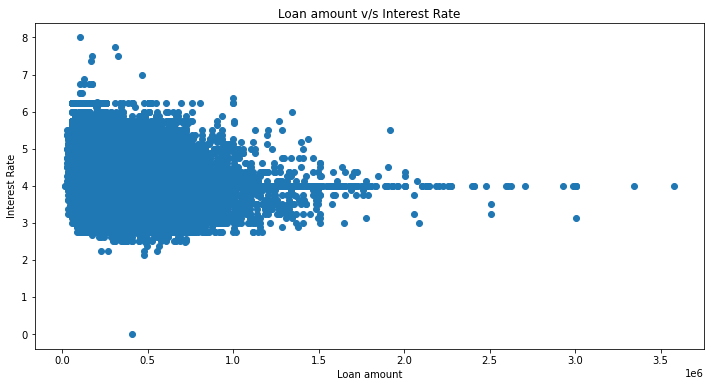

In [21]:
fig,ax=plt.subplots()
plt.scatter(plot_df['loan_amount'], plot_df['rate_of_interest'])
plt.xlabel("Loan amount")
plt.ylabel("Interest Rate")
fig.set_size_inches([12,6])
ax.set_facecolor(color="white")
plt.title("Loan amount v/s Interest Rate")
plt.savefig("LoanvsInterest.png")
plt.show()

## Part 3: Feature Scaling

### a. Categorical Features

#### Since we are dealing with categorical data, we will view which columns hold categorical data, based on the number of unique values the column holds. We start with an initial threshold of 10 unique values per column, but we never come close to that number. Based on the results of our search, we will convert these columns into categorical columns.

In [22]:
n_unique_values = 10
all_columns = loan_df.columns.to_list()
categorical_columns = []

for i, column in enumerate(all_columns):
    temp = loan_df.loc[:, column].unique()
    if len(temp) < n_unique_values:
        print (f"{i+1}. {column} has {len(temp)} unique values, which are {temp}") 
        categorical_columns.append(column)
del temp

1. loan_limit has 2 unique values, which are ['cf' 'ncf']
2. Gender has 4 unique values, which are ['Sex Not Available' 'Male' 'Joint' 'Female']
3. approv_in_adv has 2 unique values, which are ['nopre' 'pre']
4. loan_type has 3 unique values, which are ['type1' 'type2' 'type3']
5. loan_purpose has 4 unique values, which are ['p1' 'p4' 'p3' 'p2']
6. Credit_Worthiness has 2 unique values, which are ['l1' 'l2']
7. open_credit has 2 unique values, which are ['nopc' 'opc']
8. business_or_commercial has 2 unique values, which are ['nob/c' 'b/c']
14. Neg_ammortization has 2 unique values, which are ['not_neg' 'neg_amm']
15. interest_only has 2 unique values, which are ['not_int' 'int_only']
16. lump_sum_payment has 2 unique values, which are ['not_lpsm' 'lpsm']
18. construction_type has 2 unique values, which are ['sb' 'mh']
19. occupancy_type has 3 unique values, which are ['pr' 'sr' 'ir']
20. total_units has 4 unique values, which are ['1U' '2U' '3U' '4U']
22. credit_type has 4 unique value

#### In our block of code above, we created a list of column names that are categorical. We now copy those columns into a new DataFrame, and drop the Status column as we never perform any normalization or scaling on our target variable.

In [23]:
cat_columns = loan_df[categorical_columns]
cat_columns = cat_columns.drop(columns=['Status'])
cat_columns.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,1U,EXP,CIB,25-34,to_inst,south
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,lpsm,sb,pr,1U,EQUI,EXP,55-64,to_inst,North
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,not_lpsm,sb,pr,1U,EXP,CIB,35-44,to_inst,south
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,1U,EXP,CIB,45-54,not_inst,North
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,1U,CRIF,EXP,25-34,not_inst,North


#### We now leverage the pd.get_dummies( ) function, to one-hot-encode the categorical column data. We do this because it is difficult for our model to understand text data, and if the data is one-hot-encoded, it is easier for our prediction models to understand the relation between features and perform a better prediction.

In [24]:
cat_col_oneHot = pd.get_dummies(cat_columns)
cat_col_oneHot.head()

,loan_limit_cf,loan_limit_ncf,Gender_Female,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_nopre,approv_in_adv_pre,loan_type_type1,loan_type_type2,loan_type_type3,loan_purpose_p1,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,Credit_Worthiness_l1,Credit_Worthiness_l2,open_credit_nopc,open_credit_opc,business_or_commercial_b/c,business_or_commercial_nob/c,Neg_ammortization_neg_amm,Neg_ammortization_not_neg,interest_only_int_only,interest_only_not_int,lump_sum_payment_lpsm,lump_sum_payment_not_lpsm,construction_type_mh,construction_type_sb,occupancy_type_ir,occupancy_type_pr,occupancy_type_sr,total_units_1U,total_units_2U,total_units_3U,total_units_4U,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_CIB,co-applicant_credit_type_EXP,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south
0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
2,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0


### b. Numeric Features

#### We now copy the numeric columns from our original DataFrame into a new DataFrame

In [25]:
num_columns = loan_df.drop(categorical_columns, axis=1)
num_columns.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1
0,116500,3.99,0.3904,3224.996127,360.0,118000.000000,1740.0,758,98.728814,45.0
1,206500,3.99,0.3904,3224.996127,360.0,497893.465696,4980.0,552,72.746457,39.0
2,406500,4.56,0.2000,595.000000,360.0,508000.000000,9480.0,834,80.019685,46.0
3,456500,4.25,0.6810,3224.996127,360.0,658000.000000,11880.0,587,69.376900,42.0
4,696500,4.00,0.3042,0.000000,360.0,758000.000000,10440.0,602,91.886544,39.0


#### We leverage sklearn's MinMaxScaler( ) to normalize the numeric data. The MinMaxScaler( ) finds the minimum and maximum values of a column, and sets them to 0 and 1 respectively. It then scales each value in the column between 0 and 1, ensuring that the data does not lose proportion.

In [26]:
scaler = MinMaxScaler()
num_scaled = scaler.fit_transform(num_columns)
num_scaled

array([[0.02808989, 0.49875   , 0.57589707, ..., 0.645     , 0.01248503,
        0.71428571],
       [0.05337079, 0.49875   , 0.57589707, ..., 0.13      , 0.00916684,
        0.60714286],
       [0.10955056, 0.57      , 0.54867763, ..., 0.835     , 0.0100957 ,
        0.73214286],
       ...,
       [0.12078652, 0.390625  , 0.53175125, ..., 0.505     , 0.00770916,
        0.78571429],
       [0.0505618 , 0.4375    , 0.60334525, ..., 0.5925    , 0.00890338,
        0.42857143],
       [0.10955056, 0.546875  , 0.71838456, ..., 0.825     , 0.00918   ,
        0.69642857]])

#### Since the MinMaxScaler( ) outputted an array, we create a DataFrame with the normalized values

In [27]:
num_scaled_df = pd.DataFrame(num_scaled, index=num_columns.index, columns=num_columns.columns)
num_scaled_df

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1
0,0.028090,0.498750,0.575897,0.053750,1.000000,0.006667,0.003007,0.6450,0.012485,0.714286
1,0.053371,0.498750,0.575897,0.053750,1.000000,0.029691,0.008607,0.1300,0.009167,0.607143
2,0.109551,0.570000,0.548678,0.009917,1.000000,0.030303,0.016385,0.8350,0.010096,0.732143
3,0.123596,0.531250,0.617441,0.053750,1.000000,0.039394,0.020533,0.2175,0.008737,0.660714
4,0.191011,0.500000,0.563574,0.000000,1.000000,0.045455,0.018044,0.2550,0.011611,0.607143
...,...,...,...,...,...,...,...,...,...,...
148665,0.117978,0.390625,0.556841,0.166000,0.318182,0.036364,0.013585,0.3975,0.009045,0.767857
148666,0.160112,0.648750,0.642230,0.000000,1.000000,0.047273,0.012341,0.1725,0.009382,0.178571
148667,0.120787,0.390625,0.531751,0.020444,0.318182,0.043636,0.011926,0.5050,0.007709,0.785714
148668,0.050562,0.437500,0.603345,0.072056,0.318182,0.016364,0.012341,0.5925,0.008903,0.428571


#### We now concatenate our normalized categorical and numeric columns into one DataFrame, called x_data. This DataFrame now holds all our features, which have been standardized. We also create a DataFrame called y_data, which will hold our target variable (Status). We print the shape to view the number of datapoints, and to ensure they match.

In [28]:
x_data = num_scaled_df.join(cat_col_oneHot)
y_data = loan_df['Status']
print(x_data.shape)
print(y_data.shape)

(144104, 65)
(144104,)


#### We use the head( ) function to ensure that the .join( ) method correctly joined the numeric and categorical columns

In [29]:
x_data.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1,loan_limit_cf,loan_limit_ncf,Gender_Female,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_nopre,approv_in_adv_pre,loan_type_type1,loan_type_type2,loan_type_type3,loan_purpose_p1,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,Credit_Worthiness_l1,Credit_Worthiness_l2,open_credit_nopc,open_credit_opc,business_or_commercial_b/c,business_or_commercial_nob/c,Neg_ammortization_neg_amm,Neg_ammortization_not_neg,interest_only_int_only,interest_only_not_int,lump_sum_payment_lpsm,lump_sum_payment_not_lpsm,construction_type_mh,construction_type_sb,occupancy_type_ir,occupancy_type_pr,occupancy_type_sr,total_units_1U,total_units_2U,total_units_3U,total_units_4U,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_CIB,co-applicant_credit_type_EXP,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south
0,0.028090,0.49875,0.575897,0.053750,1.0,0.006667,0.003007,0.6450,0.012485,0.714286,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,0.053371,0.49875,0.575897,0.053750,1.0,0.029691,0.008607,0.1300,0.009167,0.607143,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
2,0.109551,0.57000,0.548678,0.009917,1.0,0.030303,0.016385,0.8350,0.010096,0.732143,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,0.123596,0.53125,0.617441,0.053750,1.0,0.039394,0.020533,0.2175,0.008737,0.660714,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,0.191011,0.50000,0.563574,0.000000,1.0,0.045455,0.018044,0.2550,0.011611,0.607143,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0


#### Now, leveraging sklearn's train_test_split, we split our data into training and testing sets. We will use 60% of our data to train our models, and 40% of our data to test them.

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.40, random_state=47)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(86462, 65)
(86462,)
(57642, 65)
(57642,)


## Part 4: Modelling and Prediction

#### To visualise each model's confusion matrix, we create function that takes in the confusion matrix as a function argument, and creates and returns a seaborn heatmap of the results

In [31]:
def create_heatmap(cf_matrix):
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    return sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

### Model 1: Random Forest Classifier

#### We use the RandomForestClassifier from sklearn.ensemble as our model here. We fit it with our training sets (x_train and y_train), and then predict the values using our test set (x_test). We then evaluate our model performance using the accuracy_score,  f1_score, classification_report and confusion_matrix functions from sklearn.

Test Accuracy:  1.0
Weighted F1 score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43536
           1       1.00      1.00      1.00     14106

    accuracy                           1.00     57642
   macro avg       1.00      1.00      1.00     57642
weighted avg       1.00      1.00      1.00     57642

AxesSubplot(0.125,0.125;0.62x0.755)


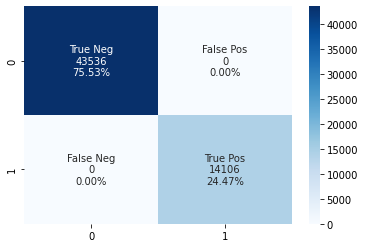

In [32]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred_RF = clf.predict(x_test)
print('Test Accuracy: ', accuracy_score(y_test, y_pred_RF))
print("Weighted F1 score: ", f1_score(y_test, y_pred_RF, average='weighted'))
class_report_RF = classification_report(y_test, y_pred_RF)
print(class_report_RF)
cf_matrix_RF = confusion_matrix(y_test, y_pred_RF)
print(create_heatmap(cf_matrix_RF))

### Model 2: Artificial Neural Network (A Multi-Layer Perceptron)

#### We use the MLPClassifier from sklearn.neural_network as our model here. We fit it with our training sets (x_train and y_train). We then evaluate our model performance using mlp.score( ) by passing it our x_train and y_train sets for a training accuracy, and our x_test and y_test sets for a testing accuracy.

In [33]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes = (30, 30),
    activation = 'relu',
    alpha = 1e-5,
    learning_rate = 'adaptive',
    learning_rate_init = 1e-3,
    tol = 1e-6,
    early_stopping = True,
    validation_fraction = 2e-1,
    n_iter_no_change = 50,
    max_iter = 1000,
    solver = 'adam', # 'lbfgs', 'sgd'
)

print(mlp.fit(x_train.to_numpy(), y_train))

print(f"iterations ran: {mlp.n_iter_}")
print(f"Train score: {mlp.score(x_train.to_numpy(), y_train)}")
print(f"Test score: {mlp.score(x_test.to_numpy(), y_test)}")

MLPClassifier(alpha=1e-05, early_stopping=True, hidden_layer_sizes=(30, 30),
              learning_rate='adaptive', max_iter=1000, n_iter_no_change=50,
              tol=1e-06, validation_fraction=0.2)
iterations ran: 190
Train score: 0.9958478869329879
Test score: 0.9943270531903821


### Model 3: Support Vector Machine

#### We use svm from sklearn as our model here. We create an instance of the support vector machine by calling svm.SVC( ). We fit it with our training sets (x_train and y_train), and then predict the values using our test set (x_test). We then evaluate our model performance using the accuracy_score, f1_score, classification_report and confusion_matrix functions from sklearn.

Test Accuracy:  0.8684639672461053
Weighted F1 score:  0.8516264420203822
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     43536
           1       0.96      0.48      0.64     14106

    accuracy                           0.87     57642
   macro avg       0.91      0.74      0.78     57642
weighted avg       0.88      0.87      0.85     57642

AxesSubplot(0.125,0.125;0.62x0.755)


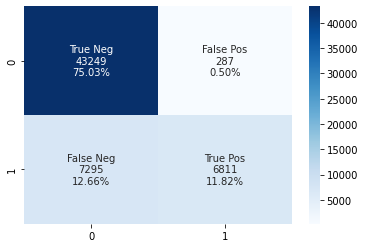

In [34]:
from sklearn import svm

clf = svm.SVC()
clf.fit(x_train, y_train)
y_pred_SVM = clf.predict(x_test)
print('Test Accuracy: ', accuracy_score(y_test, y_pred_SVM))
print("Weighted F1 score: ", f1_score(y_test, y_pred_SVM, average='weighted'))
print(classification_report(y_test, y_pred_SVM))
cf_matrix_SVM = confusion_matrix(y_test, y_pred_SVM)
print(create_heatmap(cf_matrix_SVM))

### Model 4: Decision Tree

#### We use the DecisionTreeClassifier from sklearn.tree as our model here. We fit it with our training sets (x_train and y_train), and then predict the values using our test set (x_test). We then evaluate our model performance using the accuracy_score, f1_score, classification_report and confusion_matrix functions from sklearn.

Test Accuracy:  0.9999826515388085
Weighted F1 score:  0.9999826517466411
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43536
           1       1.00      1.00      1.00     14106

    accuracy                           1.00     57642
   macro avg       1.00      1.00      1.00     57642
weighted avg       1.00      1.00      1.00     57642

AxesSubplot(0.125,0.125;0.62x0.755)


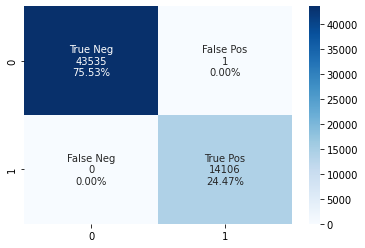

In [35]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred_DT = clf.predict(x_test)
print('Test Accuracy: ', accuracy_score(y_test, y_pred_DT))
print("Weighted F1 score: ", f1_score(y_test, y_pred_DT, average='weighted'))
print(classification_report(y_test, y_pred_DT))
cf_matrix_DT = confusion_matrix(y_test, y_pred_DT)
print(create_heatmap(cf_matrix_DT))

### Model 5: K-Nearest Neighbours

#### We use the KNeighborsClassifier from sklearn.ensemble as our model here. We fit it with our training sets (x_train and y_train), and then predict the values using our test set (x_test). We then evaluate our model performance using the accuracy_score, f1_score, classification_report and confusion_matrix functions from sklearn.

Test Accuracy:  0.8523472467992089
Weighted F1 score:  0.8391856698408355
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     43536
           1       0.82      0.51      0.63     14106

    accuracy                           0.85     57642
   macro avg       0.84      0.74      0.77     57642
weighted avg       0.85      0.85      0.84     57642

AxesSubplot(0.125,0.125;0.62x0.755)


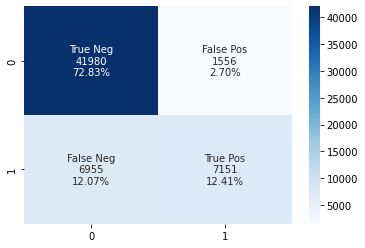

In [36]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
y_pred_KNN = clf.predict(x_test)
print('Test Accuracy: ', accuracy_score(y_test, y_pred_KNN))
print("Weighted F1 score: ", f1_score(y_test, y_pred_KNN, average='weighted'))
print(classification_report(y_test, y_pred_KNN))
cf_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)
print(create_heatmap(cf_matrix_KNN))